# Session 10 - Analysing data from start to finish <a class='tocSkip'>
$$\require{mhchem}$$

> **Learning outcomes**
>
> This session will summarise what you have seen in the course already. The learning outcomes match those of the course:
> - Perform numerical operations such as vector algebra and calculate simple statistics on data sets.
> - Write readable, well-documented and modular code.
> - Break a problem into logical steps, and use loops and decision operations to solve tasks.
> - Import and clean experimental data, and choose the appropriate variable types to hold information.
> - Fit models to numerical data, and plot the results in a number of different formats.

Note: this session does not intend to teach new concepts, but may inadvertently introduce different ways of achieving the same results. You are not being assessed on material covered in this session, but if you are unclear on anything please ask myself or a demonstrator!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os.path
sys.path.append(os.path.abspath('../'))
from helper_modules.mentimeter import Mentimeter

# The Problem
> Is the number of peaks in a <sup>1</sup>H NMR spectrum correlated with the molecular weight of the molecule?

The information available is a CSV file containing molecular weights and an identifier for the molecules, and a folder of NMR data with the matching identifiers. You do not know the chemical formulae.

In [2]:
Mentimeter(vote='https://www.menti.com/jreupbsfc9').show()

![Vote results](https://static.mentimeter.com/screenshot/1-does-the-number-of-nmr-peaks-correlate-with-mass.jpg?url=https%3A%2F%2Fwww.mentimeter.com%2Fs%2F95ad52fc829061bcdd79207a875a6dac%2Ffd83905e8834%2Fpreview&maxage=600&w=1920&h=1080&cache_buster=7)


## Task 1

In your breakout rooms discuss the following:
- the chemistry behind the problem;
- how you might go about answering the question;
- any problems with your proposed approach.

Once you have discussed each topic, add your conclusions to the mentimeter:

In [4]:
Mentimeter(vote='https://www.menti.com/gp7312ytfb').show()

![Project planning results](https://static.mentimeter.com/screenshot/1-what-will-we-need-to-do-1.jpg?url=https%3A%2F%2Fwww.mentimeter.com%2Fs%2F388f0ec99b1386cc012bbc7248426137%2F4fe36dd074e7%2Fpreview%3Fp%3D0&maxage=600&w=1920&h=1080&cache_buster=7)


# Import summary file
First, we need to import the summary data file; here we'll use Pandas.

In [6]:
# Add cells here as required


In [9]:
!head data_sources/NMR_weights.csv


id,molwt
1,136.23
2,108.14
3,134.17
4,129.16
5,100.12
6,136.15
7,180.2
8,177.2
9,166.17


In [10]:
summary = pd.read_csv('data_sources/NMR_weights.csv')
summary.head()


id   molwt
0   1  136.23
1   2  108.14
2   3  134.17
3   4  129.16
4   5  100.12

In [11]:
summary = summary.set_index('id')
summary.head()


molwt
id        
1   136.23
2   108.14
3   134.17
4   129.16
5   100.12

# Read in NMR data file
First, we need to work out how to read one file

In [12]:
# Add cells here as required


In [13]:
NMR = pd.read_csv('data_sources/NMR_data/1.txt', sep='\t', names=['a','b','c'])
NMR.head()


a         b         c
0  13.796019 -0.050616  0.263138
1  13.795790 -0.057511  0.248825
2  13.795560 -0.047204  0.235817
3  13.795331 -0.030370  0.238590
4  13.795102 -0.023873  0.254259

<AxesSubplot:>

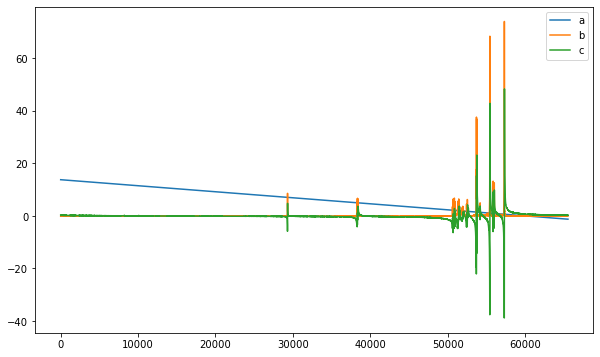

In [14]:
NMR.plot(figsize=(10,6))


In [15]:
NMR = pd.read_csv('data_sources/NMR_data/1.txt', sep='\t', names=['shift','intensity','derivative'])
NMR.head()


shift  intensity  derivative
0  13.796019  -0.050616    0.263138
1  13.795790  -0.057511    0.248825
2  13.795560  -0.047204    0.235817
3  13.795331  -0.030370    0.238590
4  13.795102  -0.023873    0.254259

<AxesSubplot:xlabel='shift'>

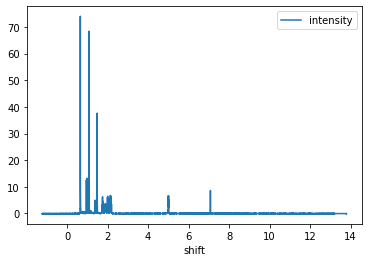

In [16]:
NMR.plot(x='shift', y='intensity')


## Read in all the files
Now we can read one file, we should write a function that can read them all.
### Read Summary

In [17]:
# Add cells here as required


In [18]:
def read_NMR_data(NMR):
    """ Read NMR data. """

    data = pd.read_csv(NMR, sep='\t', names=['shift','intensity','derivative'])
    return data

read_NMR_data('data_sources/NMR_data/10.txt')
    


shift  intensity  derivative
0      14.202218  -0.064711    0.059473
1      14.201989  -0.066458    0.048571
2      14.201760  -0.056322    0.038129
3      14.201530  -0.040992    0.040142
4      14.201301  -0.034111    0.052170
...          ...        ...         ...
65531  -0.826316  -0.058335    0.063376
65532  -0.826545  -0.066090    0.063032
65533  -0.826775  -0.070918    0.056772
65534  -0.827004  -0.069708    0.051623
65535  -0.827233  -0.069516    0.051118

[65536 rows x 3 columns]

### Read NMR spectra
**Question:** How should we store the data?

In [19]:
Mentimeter(vote = 'https://www.menti.com/osdx6tb2oe').show()

![NMR data storage poll results](https://static.mentimeter.com/screenshot/1-how-should-we-store-the-nmr-data.jpg?url=https%3A%2F%2Fwww.mentimeter.com%2Fs%2F75235f4a0888cb6105d2ed61b8defe74%2F89f2316ae869%2Fpreview&maxage=600&w=1920&h=1080&cache_buster=7)


In [ ]:
# Add cells here as required


In [21]:
NMR_data = {}
for ID in summary.index:
    NMR_file = 'data_sources/NMR_data/' + str(ID) + '.txt'
    NMR_data[ID] = read_NMR_data(NMR_file)
    
NMR_data[12]


shift  intensity  derivative
0      226.869945   1.174762    0.276854
1      226.866377   1.092591    0.318716
2      226.862810   1.009856    0.337901
3      226.859243   0.936641    0.338214
4      226.855675   0.879023    0.328234
...           ...        ...         ...
65531   -6.902104   0.193781   -1.344203
65532   -6.905671   0.253763   -1.324559
65533   -6.909239   0.321233   -1.293938
65534   -6.912806   0.390840   -1.246441
65535   -6.916374   0.453780   -1.180004

[65536 rows x 3 columns]

# NMR data exploration

To answer the problem
> Is the number of peaks in a <sup>1</sup>H NMR spectrum correlated with the molecular weight of the molecule?

we will need to determine the number of peaks in a spectrum. Before doing this, it is a good idea to check that the NMR have similar numerical values (otherwise peak finding may not work for all of them). We can generate statistics looking at:

- What range of chemical shift do they cover?
- What is the maximum intensity?
- How noisy is the baseline?

In [22]:

# Calculate shift range
min_shift = NMR_data[1]['shift'].min()
max_shift = NMR_data[1]['shift'].max()
shift_range = max_shift - min_shift

# Calculate max intensity
max_intensity = NMR_data[1]['intensity'].max()

# Calculate baseline
num_points = NMR_data[1].shape[0]
baseline_std = NMR_data[1]['intensity'].nsmallest(n = int(num_points*0.5)).std()



In [23]:
def summary_statistics(NMR_data, ID):
    """ Return summary statistics for an NMR spectrum. """
    
    # Calculate shift range
    min_shift = NMR_data[ID]['shift'].min()
    max_shift = NMR_data[ID]['shift'].max()
    shift_range = max_shift - min_shift

    # Calculate max intensity
    max_intensity = NMR_data[ID]['intensity'].max()

    # Calculate baseline
    num_points = NMR_data[ID].shape[0]
    baseline_std = NMR_data[ID]['intensity'].nsmallest(n = int(num_points*0.5)).std()
    
    return shift_range, max_intensity, baseline_std


In [24]:
for ID in summary.index:
    stats = summary_statistics(NMR_data, ID)
    summary.loc[ID, ['shift_range', 'max_int', 'baseline_std']] = stats
    
summary.head()


molwt  shift_range     max_int  baseline_std
id                                               
1   136.23    15.029452   74.038383      0.016211
2   108.14    15.029452   39.278263      0.023142
3   134.17    15.029451   95.329765      0.018059
4   129.16    15.029451   22.837284      0.010094
5   100.12    15.029451  265.857788      0.013083

In [25]:
summary.describe()


molwt  shift_range       max_int  baseline_std
count   59.000000    59.000000     59.000000     59.000000
mean   130.598475    18.832556    497.020976      0.037052
std     36.289789    28.476509   2479.134043      0.109837
min     56.060000    15.029451     17.880037      0.005242
25%    104.645000    15.029451     52.296957      0.013061
50%    129.160000    15.029452    129.392776      0.016326
75%    155.215000    15.029452    268.215363      0.020655
max    263.960000   233.786319  19181.949219      0.718201

Text(0.5, 0, 'Chemical shift range')

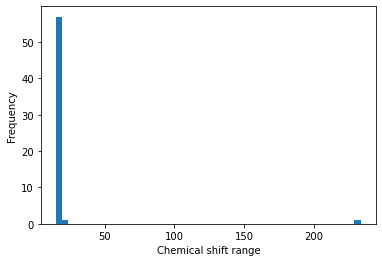

In [26]:
fig = plt.figure()
ax = fig.add_subplot()
summary['shift_range'].plot(kind='hist', bins=50, ax=ax, label='ppm range')
ax.set_xlabel('Chemical shift range')


Text(0.5, 0, 'Maximum intensity')

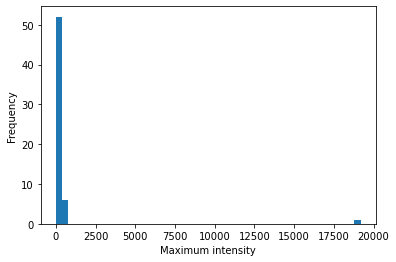

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
summary['max_int'].plot(kind='hist', bins=50, ax=ax, label='Maximum intensity')
ax.set_xlabel('Maximum intensity')


Text(0.5, 0, 'Baseline standard deviation')

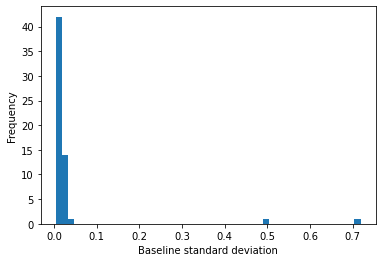

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
summary['baseline_std'].plot(kind='hist', bins=50, ax=ax, label='Baseline sigma')
ax.set_xlabel('Baseline standard deviation')


# Standardise the data

For peak searching to work effectively, we need to standardise our data. The simplest change would be to normalise the intensity values so that, e.g. the maximum is 100.

In [ ]:
# Add cells here as required


In [29]:
for ID in summary.index:
    NMR_data[ID]['intensity'] = NMR_data[ID]['intensity'] / NMR_data[ID]['intensity'].max() * 100


In [30]:
for ID in summary.index:
    stats = summary_statistics(NMR_data, ID)
    summary.loc[ID, ['shift_range', 'max_int', 'baseline_std']] = stats


Text(0.5, 0, 'Baseline standard deviation')

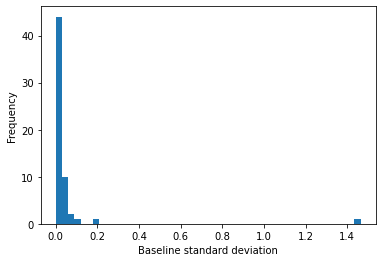

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
summary['baseline_std'].plot(kind='hist', bins=50, ax=ax, label='Baseline sigma')
ax.set_xlabel('Baseline standard deviation')


# NMR peak hunting

A number of different peak finding algorithms exist, but here we will focus on `scipy.signal.find_peaks` that you saw in session 8. Use this to determine the number of peaks in each NMR spectrum, and store these values for plotting. We can optimise the peak finding using the `prominence` parameter (in this case; other problems might need different parameters).

In [ ]:
# Add cells here as required


In [32]:
from scipy.signal import find_peaks


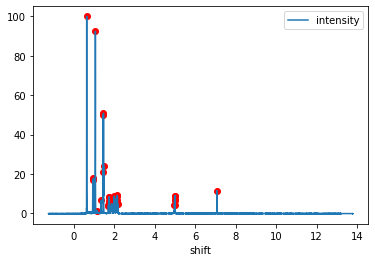

In [33]:
ID = 1
peaks, peak_info = find_peaks(NMR_data[ID]['intensity'],
                              prominence = 1,
                             )


ax = NMR_data[ID].plot(x='shift', y='intensity')
ax.scatter(NMR_data[ID]['shift'][peaks],
           NMR_data[ID]['intensity'][peaks],
           color='r'
          )

#ax.set_xlim(7.3,8)
#ax.set_ylim(0,20)


In [34]:
def count_peaks(NMR_data, ID, prominence):
    """ Return the number of peaks in an NMR spectrum. """
    
    peaks, peak_info = find_peaks(NMR_data[ID]['intensity'],
                                  prominence = prominence,
                                  )
    
    return len(peaks)


## Optimising the prominence

To find peaks automatically we need to choose a prominence value. Let's systematically test a few different ones and see what the effect is on number of peaks. There are many ways to tackle this, but here we'll use the power of pandas to plot multiple curves quickly (and neatly)!

In [ ]:
# Add cells here as required


In [35]:
prominence_range = np.arange(0.1, 5, 0.2)


# Make an empty DataFrame with 'prominence value' as the row index and 'ID' as the columns
prom_testing = pd.DataFrame(index=prominence_range, columns=summary.index)

for prom in prom_testing.index:
    for ID in prom_testing.columns:
        prom_testing.loc[prom, ID] = count_peaks(NMR_data, ID, prom)


Text(0, 0.5, 'Number of detected peaks')

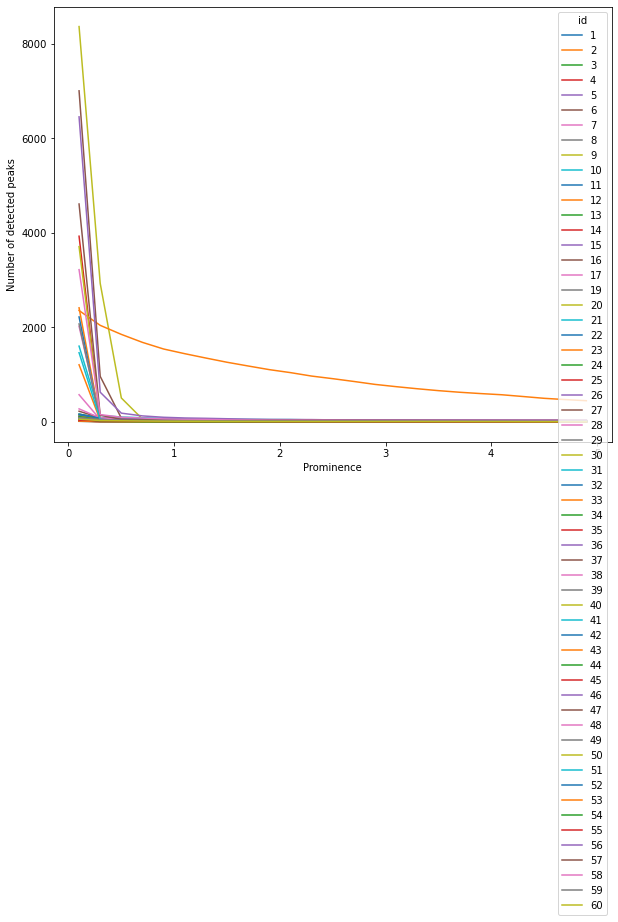

In [36]:
ax = prom_testing.plot(figsize=(10,8))
ax.set_xlabel('Prominence')
ax.set_ylabel('Number of detected peaks')


In [37]:
summary.drop(12, inplace=True)


In [38]:
# Calculate number of peaks using optimum prominence value
for ID in summary.index:
    summary.loc[ID,'num_peaks'] = count_peaks(NMR_data, ID, prominence=1)


# Analysing the results

Now we have computed the number of peaks, we can finally try to answer the question! We will try to fit a simple linear model to give an idea of the correlation (if any).

In [ ]:
# Add cells here as required


In [39]:
from scipy.stats import linregress


In [40]:
fit = linregress(summary['num_peaks'], summary['molwt'])


Text(0, 0.5, 'Molecular Weight (g mol$^{-1}$)')

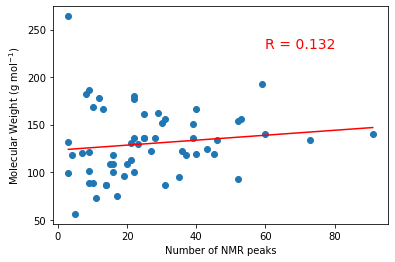

In [41]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(summary['num_peaks'], summary['molwt'])
xvals = np.linspace(summary['num_peaks'].min(), summary['num_peaks'].max(), 100)
ax.plot(xvals, fit.intercept + fit.slope*xvals, 'r', label='fitted line')
ax.text(60, 230, f"R = {fit.rvalue:.3f}", color='red', fontsize=14)
ax.set_xlabel('Number of NMR peaks')
ax.set_ylabel('Molecular Weight (g mol$^{-1}$)')


# Feedback

In [42]:
Mentimeter(vote='https://www.menti.com/8tfwaasctc').show()

In [43]:
Mentimeter(vote='https://www.menti.com/1292v5zbqw').show()